# Baseline model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from hms.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from hms.errors import L1Error, L2Error
from hms.models import SingleLayerModel, MultipleLayerModel
from hms.initialisers import UniformInit, GlorotUniformInit, ConstantInit
from hms.learning_rules import GradientDescentLearningRule, AdamLearningRule
from hms.data_providers import HMS300dDataProvider
from hms.optimisers import Optimiser
from hms.penalties import L1Penalty, L2Penalty
import seaborn as sns;
from scipy.fftpack import fft, dct

%matplotlib inline
plt.style.use('ggplot')

In [2]:
def fade_motion(motion, fading_point, window_size):
#     print("Motion length: {0}, Fading point: {1}".format(len(motion), fading_point))
    if fading_point < window_size:
        scaler = 0.9
        for i in range(fading_point, window_size):
            motion[i] *= scaler
            scaler *= scaler
    return motion

In [3]:
# Seed a random number generator
seed = 6102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

In [4]:
window_size = 50
number_of_frequency = 5

train_data = HMS300dDataProvider('train', 'extro', '{}'.format(window_size), rng=rng)
valid_data = HMS300dDataProvider('validation', 'extro', '{}'.format(window_size), rng=rng)
input_dim, output_dim = 300, 120

In [5]:
batch_size = 60  # number of data points in a batch
init_scale = 0.01  # scale for random parameter initialisation
learning_rate = 0.001  # learning rate for gradient descent
num_epochs = 100  # number of training epochs to perform
stats_interval = 1  # epoch interval between recording and printing stats
hidden_dim = 200
weight_penalty = L1Penalty(1e-5)

rng.seed(seed)
train_data.reset()
valid_data.reset()

train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

weights_init = GlorotUniformInit(rng=rng, gain=2.**0.5)
biases_init = ConstantInit(0.)


model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weight_penalty),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weight_penalty),
])

error = L2Error()
learning_rule = AdamLearningRule(learning_rate=learning_rate)

optimiser_300d = Optimiser(
        model, error, learning_rule, train_data, valid_data)

stats_300d, keys_300d, run_time_300d = optimiser_300d.train(num_epochs=num_epochs, stats_interval=stats_interval)

Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 220.90it/s]Epoch 1: 1.7s to complete
    error(train)=1.23e+02, error(valid)=2.36e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 231.26it/s]
Epoch 2: 1.7s to complete
    error(train)=1.22e+02, error(valid)=2.35e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 234.39it/s]Epoch 3: 1.6s to complete
    error(train)=1.22e+02, error(valid)=2.35e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 234.54it/s]Epoch 4: 1.6s to complete
    error(train)=1.22e+02, error(valid)=2.35e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 232.52it/s]Epoch 5: 1.6s to complete
    error(train)=1.22e+02, error(valid)=2.36e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 228.37it/s]Epoch 6: 1.7s to complete
    error(train)=1.22e+02, error(valid)=2.35e+02
Epoch Progress:  24%|██▍       | 93/380 [00:00<00:01, 227.66it/s]


Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 241.71it/s]Epoch 7: 1.6s to complete
    error(train)=1.22e+02, error(valid)=2.34e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 252.75it/s]Epoch 8: 1.5s to complete
    error(train)=1.22e+02, error(valid)=2.35e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 244.11it/s]
Epoch 9: 1.6s to complete
    error(train)=1.22e+02, error(valid)=2.34e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 236.50it/s]Epoch 10: 1.6s to complete
    error(train)=1.21e+02, error(valid)=2.34e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 236.90it/s]Epoch 11: 1.6s to complete
    error(train)=1.21e+02, error(valid)=2.36e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 227.95it/s]Epoch 12: 1.7s to complete
    error(train)=1.20e+02, error(valid)=2.36e+02
Epoch Progress:  62%|██████▏   | 236/380 [00:01<00:00, 226.33it/s]


Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 231.15it/s]Epoch 13: 1.7s to complete
    error(train)=1.20e+02, error(valid)=2.34e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 249.58it/s]Epoch 14: 1.5s to complete
    error(train)=1.20e+02, error(valid)=2.35e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 243.67it/s]Epoch 15: 1.6s to complete
    error(train)=1.19e+02, error(valid)=2.36e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 239.00it/s]Epoch 16: 1.6s to complete
    error(train)=1.19e+02, error(valid)=2.35e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 223.86it/s]Epoch 17: 1.7s to complete
    error(train)=1.18e+02, error(valid)=2.36e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 231.50it/s]Epoch 18: 1.7s to complete
    error(train)=1.17e+02, error(valid)=2.35e+02
Epoch Progress:  99%|█████████▉| 378/380 [00:01<00:00, 216.38it/s]


Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 225.34it/s]Epoch 19: 1.7s to complete
    error(train)=1.16e+02, error(valid)=2.35e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 255.74it/s]Epoch 20: 1.5s to complete
    error(train)=1.16e+02, error(valid)=2.38e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 249.75it/s]Epoch 21: 1.5s to complete
    error(train)=1.14e+02, error(valid)=2.35e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 237.04it/s]Epoch 22: 1.6s to complete
    error(train)=1.14e+02, error(valid)=2.36e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 234.73it/s]Epoch 23: 1.6s to complete
    error(train)=1.13e+02, error(valid)=2.42e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 231.91it/s]Epoch 24: 1.6s to complete
    error(train)=1.12e+02, error(valid)=2.39e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 224.69it/s]Epoch 25: 1.7s to complete
    error(train)=1.11e+02, error(valid)=2.39e+02
Epoch 

Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 249.00it/s]Epoch 26: 1.5s to complete
    error(train)=1.10e+02, error(valid)=2.43e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 249.36it/s]Epoch 27: 1.5s to complete
    error(train)=1.09e+02, error(valid)=2.42e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 245.24it/s]Epoch 28: 1.6s to complete
    error(train)=1.08e+02, error(valid)=2.44e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 239.03it/s]Epoch 29: 1.6s to complete
    error(train)=1.07e+02, error(valid)=2.46e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 233.71it/s]Epoch 30: 1.6s to complete
    error(train)=1.06e+02, error(valid)=2.46e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 229.91it/s]Epoch 31: 1.7s to complete
    error(train)=1.06e+02, error(valid)=2.42e+02
Epoch Progress:  62%|██████▏   | 235/380 [00:01<00:00, 228.11it/s]


Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 232.18it/s]Epoch 32: 1.6s to complete
    error(train)=1.04e+02, error(valid)=2.45e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 239.80it/s]Epoch 33: 1.6s to complete
    error(train)=1.04e+02, error(valid)=2.48e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 245.68it/s]Epoch 34: 1.6s to complete
    error(train)=1.03e+02, error(valid)=2.48e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 241.38it/s]Epoch 35: 1.6s to complete
    error(train)=1.02e+02, error(valid)=2.47e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 238.84it/s]Epoch 36: 1.6s to complete
    error(train)=1.01e+02, error(valid)=2.48e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 229.86it/s]Epoch 37: 1.7s to complete
    error(train)=1.02e+02, error(valid)=2.49e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 220.30it/s]Epoch 38: 1.7s to complete
    error(train)=1.00e+02, error(valid)=2.48e+02


Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 249.63it/s]Epoch 39: 1.5s to complete
    error(train)=9.99e+01, error(valid)=2.51e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 250.54it/s]Epoch 40: 1.5s to complete
    error(train)=1.00e+02, error(valid)=2.54e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 234.26it/s]Epoch 41: 1.6s to complete
    error(train)=9.84e+01, error(valid)=2.49e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 237.13it/s]Epoch 42: 1.6s to complete
    error(train)=9.82e+01, error(valid)=2.53e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 236.53it/s]Epoch 43: 1.6s to complete
    error(train)=9.74e+01, error(valid)=2.53e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 223.32it/s]Epoch 44: 1.7s to complete
    error(train)=9.70e+01, error(valid)=2.52e+02
Epoch Progress:  24%|██▍       | 93/380 [00:00<00:01, 223.70it/s]


Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 237.83it/s]Epoch 45: 1.6s to complete
    error(train)=9.68e+01, error(valid)=2.56e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 242.22it/s]Epoch 46: 1.6s to complete
    error(train)=9.61e+01, error(valid)=2.56e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 243.38it/s]
Epoch 47: 1.6s to complete
    error(train)=9.58e+01, error(valid)=2.54e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 237.62it/s]Epoch 48: 1.6s to complete
    error(train)=9.52e+01, error(valid)=2.55e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 222.23it/s]
Epoch 49: 1.7s to complete
    error(train)=9.50e+01, error(valid)=2.58e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 229.63it/s]Epoch 50: 1.7s to complete
    error(train)=9.47e+01, error(valid)=2.59e+02
Epoch Progress:  68%|██████▊   | 259/380 [00:01<00:00, 228.31it/s]


Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 228.74it/s]Epoch 51: 1.7s to complete
    error(train)=9.41e+01, error(valid)=2.61e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 231.60it/s]Epoch 52: 1.6s to complete
    error(train)=9.40e+01, error(valid)=2.58e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 237.09it/s]Epoch 53: 1.6s to complete
    error(train)=9.32e+01, error(valid)=2.58e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 231.20it/s]Epoch 54: 1.7s to complete
    error(train)=9.31e+01, error(valid)=2.58e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 232.00it/s]Epoch 55: 1.6s to complete
    error(train)=9.28e+01, error(valid)=2.58e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 228.90it/s]Epoch 56: 1.7s to complete
    error(train)=9.22e+01, error(valid)=2.61e+02
Epoch Progress:  99%|█████████▉| 378/380 [00:01<00:00, 224.11it/s]


Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 221.59it/s]Epoch 57: 1.7s to complete
    error(train)=9.23e+01, error(valid)=2.58e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 245.33it/s]Epoch 58: 1.6s to complete
    error(train)=9.18e+01, error(valid)=2.58e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 241.83it/s]Epoch 59: 1.6s to complete
    error(train)=9.17e+01, error(valid)=2.63e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 234.22it/s]Epoch 60: 1.6s to complete
    error(train)=9.17e+01, error(valid)=2.61e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 226.47it/s]Epoch 61: 1.7s to complete
    error(train)=9.09e+01, error(valid)=2.63e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 223.32it/s]Epoch 62: 1.7s to complete
    error(train)=9.09e+01, error(valid)=2.65e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 222.44it/s]Epoch 63: 1.7s to complete
    error(train)=9.05e+01, error(valid)=2.67e+02
Experi

Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 245.93it/s]Epoch 64: 1.6s to complete
    error(train)=9.04e+01, error(valid)=2.64e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 236.31it/s]Epoch 65: 1.6s to complete
    error(train)=9.00e+01, error(valid)=2.64e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 240.29it/s]Epoch 66: 1.6s to complete
    error(train)=8.99e+01, error(valid)=2.61e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 236.43it/s]Epoch 67: 1.6s to complete
    error(train)=8.95e+01, error(valid)=2.66e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 225.47it/s]Epoch 68: 1.7s to complete
    error(train)=8.96e+01, error(valid)=2.67e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 222.99it/s]Epoch 69: 1.7s to complete
    error(train)=8.93e+01, error(valid)=2.66e+02
Epoch Progress:  19%|█▉        | 73/380 [00:00<00:01, 236.89it/s]


Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 244.63it/s]Epoch 70: 1.6s to complete
    error(train)=8.88e+01, error(valid)=2.66e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 252.80it/s]Epoch 71: 1.5s to complete
    error(train)=8.87e+01, error(valid)=2.69e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 205.71it/s]Epoch 72: 1.9s to complete
    error(train)=8.88e+01, error(valid)=2.68e+02
Epoch Progress: 100%|██████████| 380/380 [00:02<00:00, 175.64it/s]Epoch 73: 2.2s to complete
    error(train)=8.82e+01, error(valid)=2.73e+02
Epoch Progress: 100%|██████████| 380/380 [00:02<00:00, 181.19it/s]Epoch 74: 2.1s to complete
    error(train)=8.82e+01, error(valid)=2.73e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 215.90it/s]Epoch 75: 1.8s to complete
    error(train)=8.81e+01, error(valid)=2.68e+02
  0%|          | 0/380 [00:00<?, ?it/s]


Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 202.02it/s]Epoch 76: 1.9s to complete
    error(train)=8.78e+01, error(valid)=2.71e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 244.97it/s]Epoch 77: 1.6s to complete
    error(train)=8.73e+01, error(valid)=2.74e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 237.39it/s]Epoch 78: 1.6s to complete
    error(train)=8.73e+01, error(valid)=2.74e+02
Epoch Progress: 100%|██████████| 380/380 [00:02<00:00, 180.52it/s]Epoch 79: 2.1s to complete
    error(train)=8.76e+01, error(valid)=2.72e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 219.21it/s]Epoch 80: 1.7s to complete
    error(train)=8.73e+01, error(valid)=2.69e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 213.17it/s]Epoch 81: 1.8s to complete
    error(train)=8.72e+01, error(valid)=2.73e+02


Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 218.19it/s]Epoch 82: 1.8s to complete
    error(train)=8.71e+01, error(valid)=2.75e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 247.94it/s]Epoch 83: 1.5s to complete
    error(train)=8.71e+01, error(valid)=2.76e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 232.65it/s]Epoch 84: 1.6s to complete
    error(train)=8.73e+01, error(valid)=2.76e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 219.07it/s]Epoch 85: 1.7s to complete
    error(train)=8.63e+01, error(valid)=2.75e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 195.67it/s]Epoch 86: 2.0s to complete
    error(train)=8.65e+01, error(valid)=2.75e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 198.00it/s]Epoch 87: 1.9s to complete
    error(train)=8.63e+01, error(valid)=2.78e+02


Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 257.01it/s]Epoch 88: 1.5s to complete
    error(train)=8.59e+01, error(valid)=2.76e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 247.52it/s]Epoch 89: 1.5s to complete
    error(train)=8.58e+01, error(valid)=2.75e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 203.03it/s]Epoch 90: 1.9s to complete
    error(train)=8.59e+01, error(valid)=2.76e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 225.48it/s]Epoch 91: 1.7s to complete
    error(train)=8.58e+01, error(valid)=2.78e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 219.18it/s]Epoch 92: 1.7s to complete
    error(train)=8.59e+01, error(valid)=2.75e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 216.82it/s]Epoch 93: 1.8s to complete
    error(train)=8.55e+01, error(valid)=2.77e+02
Epoch Progress:   6%|▌         | 23/380 [00:00<00:01, 229.48it/s]


Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 246.75it/s]Epoch 94: 1.6s to complete
    error(train)=8.51e+01, error(valid)=2.77e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 237.97it/s]Epoch 95: 1.6s to complete
    error(train)=8.53e+01, error(valid)=2.79e+02
Epoch Progress: 100%|██████████| 380/380 [00:02<00:00, 181.42it/s]Epoch 96: 2.1s to complete
    error(train)=8.50e+01, error(valid)=2.77e+02
Epoch Progress: 100%|██████████| 380/380 [00:02<00:00, 186.84it/s]Epoch 97: 2.0s to complete
    error(train)=8.56e+01, error(valid)=2.79e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 222.68it/s]Epoch 98: 1.7s to complete
    error(train)=8.49e+01, error(valid)=2.79e+02
Epoch Progress:  98%|█████████▊| 374/380 [00:01<00:00, 219.96it/s]


Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 207.73it/s]Epoch 99: 1.8s to complete
    error(train)=8.47e+01, error(valid)=2.78e+02
Epoch Progress: 100%|██████████| 380/380 [00:01<00:00, 250.08it/s]Epoch 100: 1.5s to complete
    error(train)=8.48e+01, error(valid)=2.80e+02
Experiment Progress: 100%|██████████| 100/100 [03:13<00:00,  2.02s/it]


In [35]:
def smooth_prediction(raw_prediction):
    output_shape = raw_prediction.shape
    # make a matrix that adds 20 lines paddings at the beginning & end of raw prediction
    calculation_frame = np.zeros((output_shape[0]+40, output_shape[1]))
    output = np.zeros(raw_prediction.shape)
    calculation_frame[20:-20, :] = raw_prediction
    
    for i in range(output_shape[0]):
        output[i,:] = calculation_frame[i+20,:] + \
        0.6 * (calculation_frame[i+21,:] + calculation_frame[i+19,:]) + \
        0.6 * (calculation_frame[i+22,:] + calculation_frame[i+18,:]) + \
        0.6 * (calculation_frame[i+23,:] + calculation_frame[i+17,:]) + \
        0.6 * (calculation_frame[i+24,:] + calculation_frame[i+16,:]) + \
        0.6 * (calculation_frame[i+25,:] + calculation_frame[i+15,:]) + \
        0.5 * (calculation_frame[i+26,:] + calculation_frame[i+14,:]) + \
        0.5 * (calculation_frame[i+27,:] + calculation_frame[i+13,:]) + \
        0.5 * (calculation_frame[i+28,:] + calculation_frame[i+12,:]) + \
        0.5 * (calculation_frame[i+29,:] + calculation_frame[i+11,:]) + \
        0.5 * (calculation_frame[i+30,:] + calculation_frame[i+10,:]) + \
        0.4 * (calculation_frame[i+31,:] + calculation_frame[i+9,:]) + \
        0.4 * (calculation_frame[i+32,:] + calculation_frame[i+8,:]) + \
        0.4 * (calculation_frame[i+33,:] + calculation_frame[i+7,:]) + \
        0.4 * (calculation_frame[i+34,:] + calculation_frame[i+6,:]) + \
        0.3 * (calculation_frame[i+35,:] + calculation_frame[i+5,:]) + \
        0.3 * (calculation_frame[i+36,:] + calculation_frame[i+4,:]) + \
        0.2 * (calculation_frame[i+37,:] + calculation_frame[i+3,:]) + \
        0.2 * (calculation_frame[i+38,:] + calculation_frame[i+2,:]) + \
        0.1 * (calculation_frame[i+39,:] + calculation_frame[i+1,:])
    output /= 9.0
    return output

In [36]:
for i in range(1,7):
    test_data = HMS300dDataProvider('test{}'.format(i), 'extro', '{}'.format(window_size), rng=rng)

    result, evaluation = optimiser_300d.eval_test_set(test_data, 'test{}'.format(i))
    print(evaluation)
    prediction = result[-1]  
    
    result_reshape = np.zeros((result[-1].shape[0], 6, 20)) # needs testig
    for j in range(result[-1].shape[0]):
        result_reshape[j] = result[-1][j].reshape(6,20)    
    
    time_intervals = np.loadtxt("ExtrovertRawData/Words/{}".format(i), usecols=range(4, 6), dtype="int")
    words = np.loadtxt("ExtrovertRawData/Words/{}".format(i), usecols=range(3, 4), dtype="str")
    
    prediction = np.zeros((6, time_intervals[-1,1] + window_size))
    counter = 0
    for index, line in enumerate(time_intervals):
        word = words[index]
        word_split = word.split('\'')
        
        if len(word_split) <= 1:   
            start_time = line[0]
            end_time = line[1]
            fading_point = end_time - start_time
            
            for k in range(6):
                frame = np.zeros(window_size)
                frame[0:number_of_frequency] = result_reshape[counter][k][0:number_of_frequency]
                dct_motion = dct(frame, 3, norm="ortho")
                faded_motion = fade_motion(dct_motion, fading_point, window_size)
                prediction[k, start_time:start_time + window_size] += faded_motion 
            counter += 1
        else:
            start_time = line[0]
            end_time = line[1]
            mid = int((line[0] + line[1]) / 2)
            fading_point_1 = mid - start_time
            fading_point_2 = end_time - mid
            
            for k in range(6):
                frame_1 = np.zeros(window_size)
                frame_1[0:number_of_frequency] = result_reshape[counter][k][0:number_of_frequency]
                dct_motion_1 = dct(frame_1, 3, norm="ortho")
                faded_motion_1 = fade_motion(dct_motion_1, fading_point_1, window_size)
                prediction[k, start_time:start_time + window_size] += faded_motion_1
                
                frame_2 = np.zeros(window_size)
                frame_2[0:number_of_frequency] = result_reshape[counter+1][k][0:number_of_frequency]
                dct_motion_2 = dct(frame_2, 3, norm="ortho")
                faded_motion_2 = fade_motion(dct_motion_2, fading_point_2, window_size)
                prediction[k, mid:mid + window_size] += faded_motion_2
            counter += 2
        
    prediction = prediction.transpose()
    prediction = smooth_prediction(prediction)

    np.savetxt("Short Test Case {}".format(i), prediction)
    
    motion_data = np.loadtxt("ExtrovertRawData/Motion/{}.rov".format(i), skiprows=17, usecols=range(0, 6))

    print("Actual motion length: {}, prediction length: {}".format(motion_data.shape, prediction.shape))

OrderedDict([('errortest1', 199.41880462033811)])
Actual motion length: (31467, 6), prediction length: (31489, 6)
OrderedDict([('errortest2', 303.16660626116379)])
Actual motion length: (31983, 6), prediction length: (31988, 6)
OrderedDict([('errortest3', 265.32156249591355)])
Actual motion length: (35331, 6), prediction length: (35130, 6)
OrderedDict([('errortest4', 330.86873452134597)])
Actual motion length: (30155, 6), prediction length: (30127, 6)
OrderedDict([('errortest5', 192.20412383496731)])
Actual motion length: (31798, 6), prediction length: (31666, 6)
OrderedDict([('errortest6', 2004.3437311569701)])
Actual motion length: (34518, 6), prediction length: (34339, 6)


In [37]:
def get_talking_motion(targets, motion_data, time_intervals):

    for index, word in enumerate(time_intervals):
        start_time = time_intervals[index][0]
        end_time = time_intervals[index][1]

        for t in range(start_time, end_time):
            targets.append(motion_data[t])

In [38]:
########## Prediction for each test case:
predictions_300d = []

########## L2 error for each dimension in each case, 6x6:
errors_300d = np.zeros((6,6))

########## STD of ground truth on each dimension, 6x6:
std_ground_truth_300d = np.zeros((6,6))

########## STD of prediction on each dimension, 6x6:
std_prediction_300d = np.zeros((6,6))

########## Smoothness of ground truth, 6x6:
smoothness_ground_truth_300d = np.zeros((6,6))

########## Smoothness of prediction, 6x6:
smoothness_prediction_300d = np.zeros((6,6))


for i in range(1, 7):
    targets = []
    
    motion_data = np.loadtxt("Short Test Case {}".format(i), usecols=range(0, 6))
    time_intervals = np.loadtxt("ExtrovertRawData/Words/{0}".format(i), usecols=range(4, 6), dtype="int")
        
    get_talking_motion(targets, motion_data, time_intervals)
    prediction = np.array(targets)
    
    ground_truth = np.load('data/Wiki/test{}_300d_skip10_extro.npz'.format(i))['targets']

    predictions_300d.append(prediction)

    data_length = ground_truth.shape[0] 

    # Calculate smoothness of ground truth
    smo_GT = ground_truth[1:, :] - ground_truth[:-1, :]
    smo_GT = np.absolute(smo_GT)
    smoothness_ground_truth_300d[i-1] = np.mean(smo_GT, axis = 0)
    
    # Calculate smoothness of prediction
    smo_P = prediction[1:, :] - prediction[:-1, :]
    smo_P = np.absolute(smo_P)
    smoothness_prediction_300d[i-1] = np.mean(smo_P, axis = 0)
    
    # Calculate errors
    num_batch = data_length / batch_size
    
    calc = 0.5 * np.sum((prediction - ground_truth)**2, axis=0) / num_batch
    calc_rounded = np.round(calc, 3)
    errors_300d[i-1] = calc
    std_ground_truth_300d[i-1] = np.std(ground_truth, axis = 0)
    std_prediction_300d[i-1] = np.std(prediction, axis = 0)

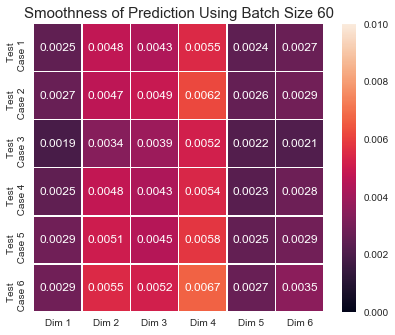

In [39]:
ylabels = ['Test \n Case 1', 'Test \n Case 2','Test \n Case 3','Test \n Case 4','Test \n Case 5','Test \n Case 6']
xlabels = ['Dim 1', 'Dim 2','Dim 3','Dim 4','Dim 5','Dim 6']

ax = plt.axes()

sns.heatmap(smoothness_prediction_300d, vmin=0, vmax=0.01, linewidths=.5, annot=True, xticklabels = xlabels, yticklabels = ylabels, ax= ax)
ax.set_title('Smoothness of Prediction Using Batch Size {}'.format(batch_size),size=15)
# plt.savefig("ExtroValidationSTD.pdf")
plt.show()

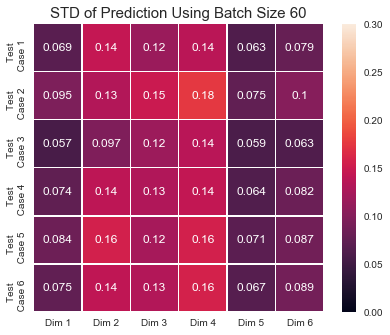

In [40]:
ylabels = ['Test \n Case 1', 'Test \n Case 2','Test \n Case 3','Test \n Case 4','Test \n Case 5','Test \n Case 6']
xlabels = ['Dim 1', 'Dim 2','Dim 3','Dim 4','Dim 5','Dim 6']

ax = plt.axes()

sns.heatmap(std_prediction_300d, vmin=0, vmax=0.3, linewidths=.5, annot=True, xticklabels = xlabels, yticklabels = ylabels, ax= ax)
ax.set_title('STD of Prediction Using Batch Size {}'.format(batch_size),size=15)
# plt.savefig("Wiki ExtroTestSTD.pdf")
plt.show()

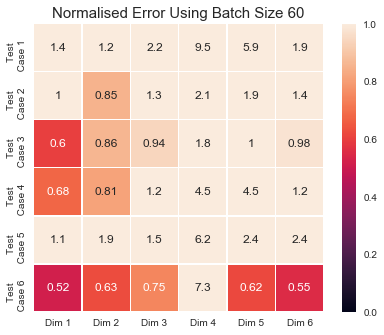

In [41]:
ylabels = ['Test \n Case 1', 'Test \n Case 2','Test \n Case 3','Test \n Case 4','Test \n Case 5','Test \n Case 6']
xlabels = ['Dim 1', 'Dim 2','Dim 3','Dim 4','Dim 5','Dim 6']

ax = plt.axes()
########## need to divide by batch size
normalised_error_300d = errors_300d/(batch_size * std_ground_truth_300d**2)

sns.heatmap(normalised_error_300d, vmin=0, vmax=1, linewidths=.5, annot=True, xticklabels = xlabels, yticklabels = ylabels, ax= ax)
ax.set_title('Normalised Error Using Batch Size {}'.format(batch_size),size=15)
# plt.savefig("ExtroTestSTD.pdf")
plt.show()

In [42]:
########## Producing CC maps for each Test case

CC_300d = []
CC_300d_mean = np.zeros((12,12))

for i in range(1,7):
    motion_transpose = np.load('data/Wiki/test{}_extro.npz'.format(i))['targets'].transpose()
    prediction_transpose = np.array(predictions_300d[i-1].transpose())
    pearson_correlation_coefficient = np.corrcoef(motion_transpose, prediction_transpose)
    CC_300d.append(pearson_correlation_coefficient)
    CC_300d_mean += pearson_correlation_coefficient

CC_300d_mean /= 6.0

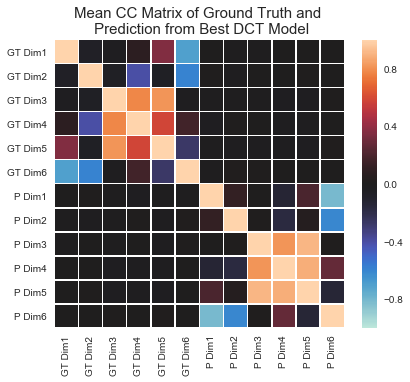

In [43]:
labels = ['GT Dim1', 'GT Dim2','GT Dim3','GT Dim4','GT Dim5','GT Dim6', 'P Dim1', 'P Dim2', 'P Dim3', 'P Dim4', 'P Dim5', 'P Dim6',]
ax = plt.axes()
sns.set(rc={'figure.figsize':(6.5,5.3)})

########## No annotation, or too messy
plot = sns.heatmap(CC_300d_mean, center=0, vmin = -1, vmax = 1, linewidths=.5, xticklabels = labels, yticklabels = labels, ax= ax)
ax.set_title('Mean CC Matrix of Ground Truth and \n Prediction from Best DCT Model', size=15)
# plt.savefig("DCT Test Set.pdf")
plt.show()

In [44]:
mean_std_groundtruth = np.mean(std_ground_truth_300d, axis = 0)
mean_std_300d = np.mean(std_prediction_300d, axis = 0)
print(np.round(mean_std_groundtruth, 3))
print(np.round(mean_std_300d, 3))

[ 0.151  0.16   0.119  0.084  0.062  0.103]
[ 0.076  0.135  0.128  0.151  0.067  0.084]


In [45]:
print(np.round(np.mean(normalised_error_300d, axis = 0), 3))

[ 0.871  1.029  1.316  5.218  2.722  1.385]


In [46]:
print(np.round(np.mean(smoothness_ground_truth_300d, axis = 0), 3))
print(np.round(np.mean(smoothness_prediction_300d, axis = 0), 3))

[ 0.003  0.004  0.004  0.003  0.002  0.002]
[ 0.003  0.005  0.005  0.006  0.002  0.003]


OrderedDict([('errortest1', 199.41880462033811)])
Actual motion length: (31467, 6), prediction length: (31489, 6), smoothed length: (31489, 6)


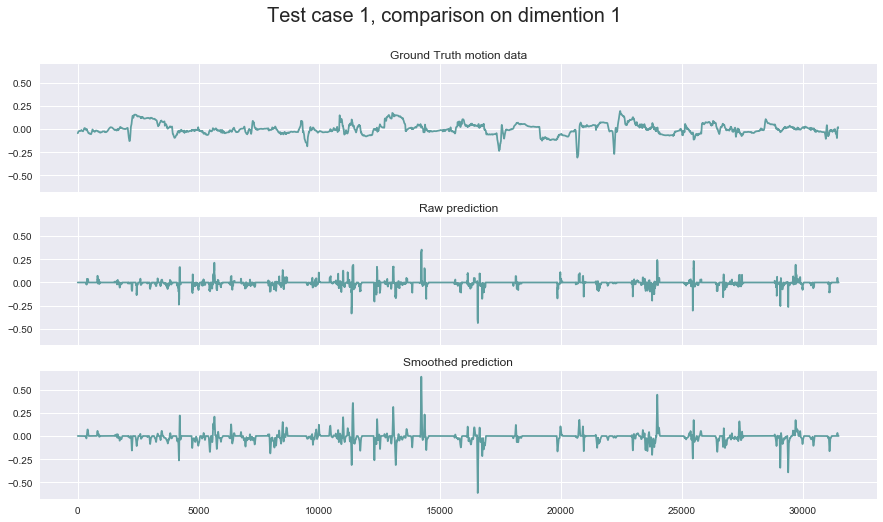

OrderedDict([('errortest2', 303.16660626116379)])
Actual motion length: (31983, 6), prediction length: (31988, 6), smoothed length: (31988, 6)


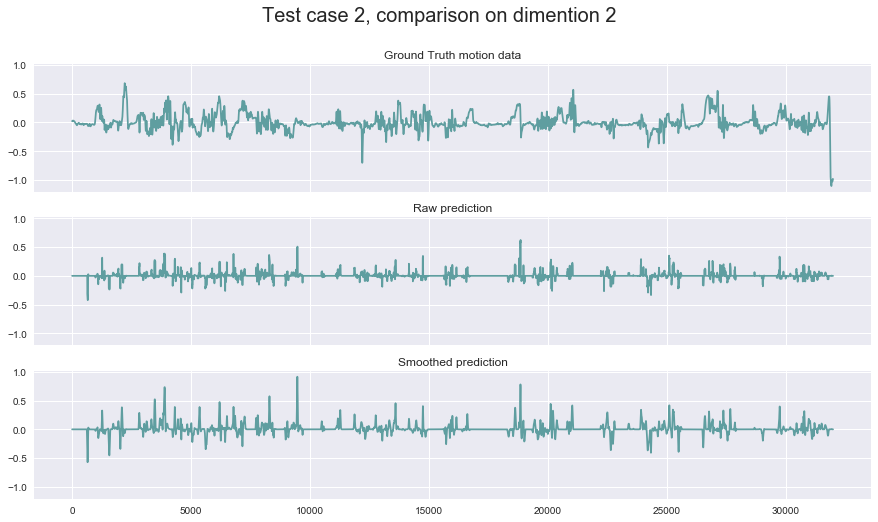

OrderedDict([('errortest3', 265.32156249591361)])
Actual motion length: (35331, 6), prediction length: (35130, 6), smoothed length: (35130, 6)


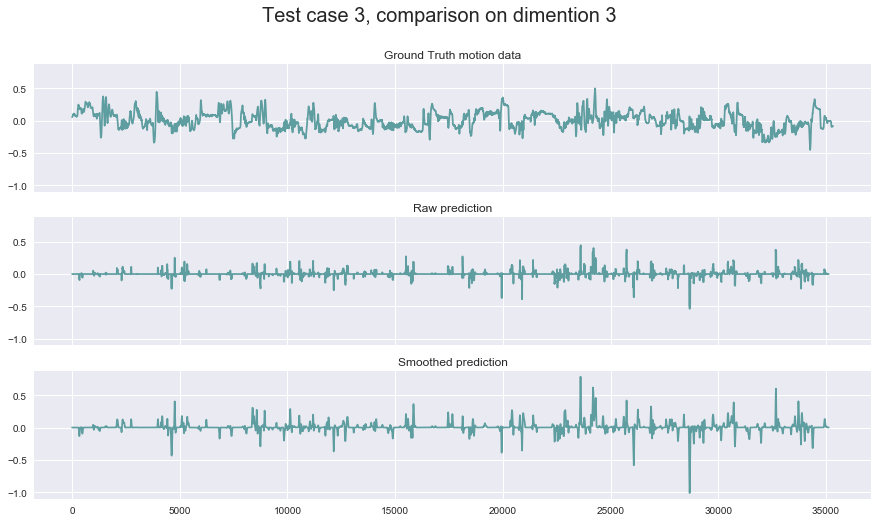

OrderedDict([('errortest4', 330.86873452134597)])
Actual motion length: (30155, 6), prediction length: (30127, 6), smoothed length: (30127, 6)


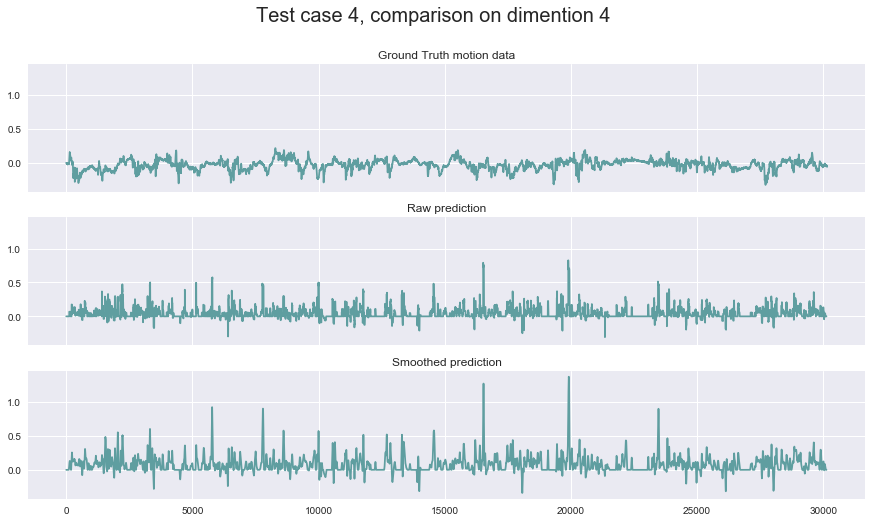

OrderedDict([('errortest5', 192.20412383496731)])
Actual motion length: (31798, 6), prediction length: (31666, 6), smoothed length: (31666, 6)


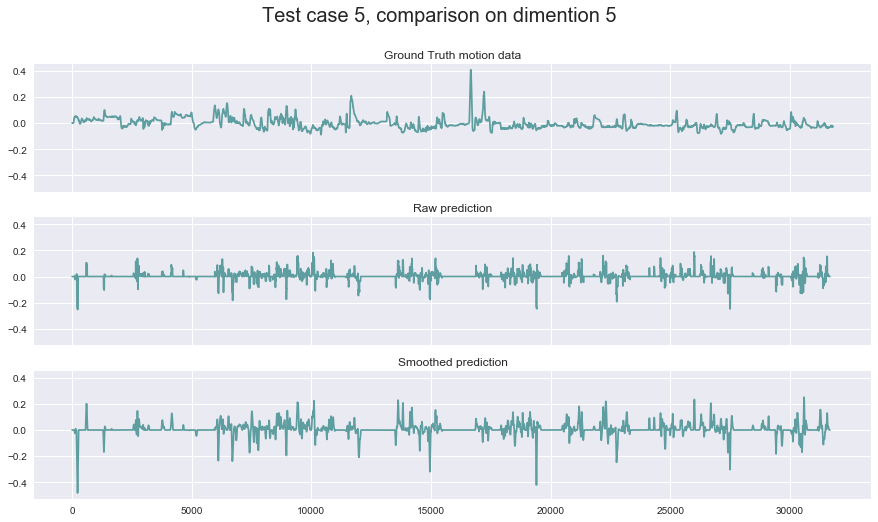

OrderedDict([('errortest6', 2004.3437311569701)])
Actual motion length: (34518, 6), prediction length: (34339, 6), smoothed length: (34339, 6)


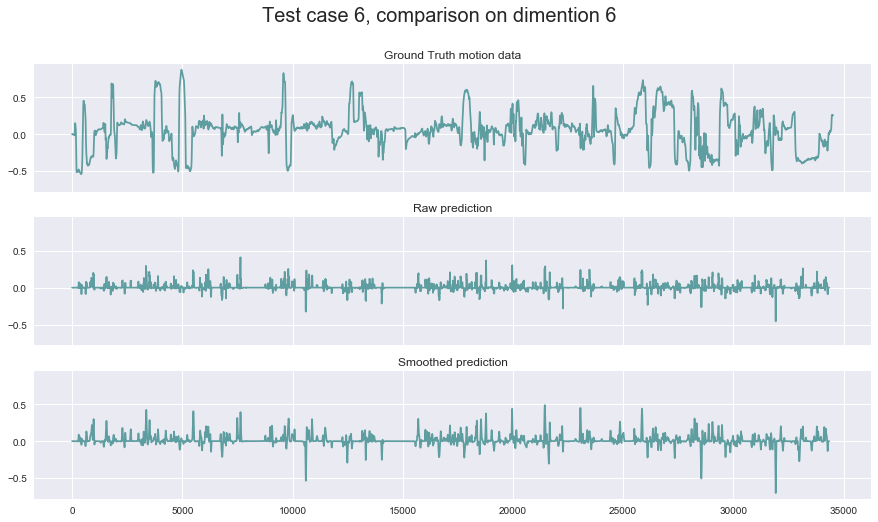

In [47]:
# Loop over 1-6 test cases

for i in range(1,7):
    
    test_data = HMS300dDataProvider('test{}'.format(i), 'extro', '{}'.format(window_size), rng=rng)

    result, evaluation = optimiser_300d.eval_test_set(test_data, 'test{}'.format(i))
    print(evaluation)
    prediction = result[-1]    
    
    result_reshape = np.zeros((result[-1].shape[0], 6, 20)) # needs testig
    for j in range(result[-1].shape[0]):
        result_reshape[j] = result[-1][j].reshape(6,20)    
    
    time_intervals = np.loadtxt("ExtrovertRawData/Words/{}".format(i), usecols=range(4, 6), dtype="int")
    words = np.loadtxt("ExtrovertRawData/Words/{}".format(i), usecols=range(3, 4), dtype="str")
    
    prediction = np.zeros((6, time_intervals[-1,1] + window_size))
    counter = 0
   
    for index, line in enumerate(time_intervals):
        word = words[index]
        word_split = word.split('\'')
        
        if len(word_split) <= 1:   
            start_time = line[0]
            end_time = line[1]
            fading_point = end_time - start_time
            
            for k in range(6):
                frame = np.zeros(window_size)
                frame[0:number_of_frequency] = result_reshape[counter][k][0:number_of_frequency]
                dct_motion = dct(frame, 3, norm="ortho")
                faded_motion = fade_motion(dct_motion, fading_point, window_size)
                prediction[k, start_time:start_time + window_size] += faded_motion 
            counter += 1
        else:
            start_time = line[0]
            end_time = line[1]
            mid = int((line[0] + line[1]) / 2)
            fading_point_1 = mid - start_time
            fading_point_2 = end_time - mid
            
            for k in range(6):
                frame_1 = np.zeros(window_size)
                frame_1[0:number_of_frequency] = result_reshape[counter][k][0:number_of_frequency]
                dct_motion_1 = dct(frame_1, 3, norm="ortho")
                faded_motion_1 = fade_motion(dct_motion_1, fading_point_1, window_size)
                prediction[k, start_time:start_time + window_size] += faded_motion_1
                
                frame_2 = np.zeros(window_size)
                frame_2[0:number_of_frequency] = result_reshape[counter+1][k][0:number_of_frequency]
                dct_motion_2 = dct(frame_2, 3, norm="ortho")
                faded_motion_2 = fade_motion(dct_motion_2, fading_point_2, window_size)
                prediction[k, mid:mid + window_size] += faded_motion_2
            counter += 2
        
    prediction = prediction.transpose()
    smoothed_prediction = smooth_prediction(prediction)

    
    np.savetxt("Test Case {}.txt".format(i), prediction)
    np.savetxt("Test Case Smoothed {}.txt".format(i), smoothed_prediction)
    
    motion_data = np.loadtxt("ExtrovertRawData/Motion/{}.rov".format(i), skiprows=17, usecols=range(0, 6))

    print("Actual motion length: {}, prediction length: {}, smoothed length: {}".format(
        motion_data.shape, prediction.shape, smoothed_prediction.shape))
    

    # Two subplots, the axes array is 1-d
    f, axarr = plt.subplots(3, sharex=True, sharey=True, figsize=(15,8))
    axarr[0].plot(motion_data[:,i-1], color = 'cadetblue')
    axarr[0].set_title('Ground Truth motion data')
    axarr[1].plot(prediction[:,i-1], color = 'cadetblue')
    axarr[1].set_title('Raw prediction')
    axarr[2].plot(smoothed_prediction[:,i-1], color = 'cadetblue')
    axarr[2].set_title('Smoothed prediction')
    
    plt.suptitle('Test case {}, comparison on dimention {}'.format(i, i), size = 20)
#     plt.savefig('Predictions/Test case {0}, comparison on dimention {1}.pdf'.format(i, i))
    plt.show()